In [22]:
import os 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot

from helper.config import Config
from helper  import model as MaskRCNN
from helper import visualize
from helper  import model as modellib, utils
from helper  import visualize

In [2]:
#inherting  from Config class

class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2
 
    # number of classes (we would normally add +1 for the background)
     # kangaroo + BG
    NUM_CLASSES = 1+10
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 8750 #(tatal train images 8750 divided by batch_size)
    
    # Learning rate
    LEARNING_RATE=0.001
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.8
    
    # setting Max ground truth instances
    MAX_GT_INSTANCES=10

In [3]:
config= myMaskRCNNConfig()

In [ ]:
# initialize the Mask R-CNN model for inference 
print("Loading Mask R-CNN model...")
model = modellib.MaskRCNN(mode="training", config=config, model_dir='./')

In [5]:
def get_ax(rows=1, cols=1, size=16):
    _, ax = pyplot.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [ ]:
model_path = 'trained.model/trained.CFSEG.h5'

# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.80

config = InferenceConfig()
config.display()

#Loading the model in the inference mode
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')

# loading the trained weights o the custom dataset
model.load_weights(model_path, by_name=True)

image name:  Image_00_2_2.bmp
Processing 1 images
image                    shape: (1500, 1600, 3)       min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
image name:  Image_02_2_1.bmp
Processing 1 images
image                    shape: (1500, 1600, 3)       min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
image name:  Image_00_1_2.bmp
Processing 1 images
image                    shape: (1500, 1600, 3)       min:    3.00000  max:  255.0

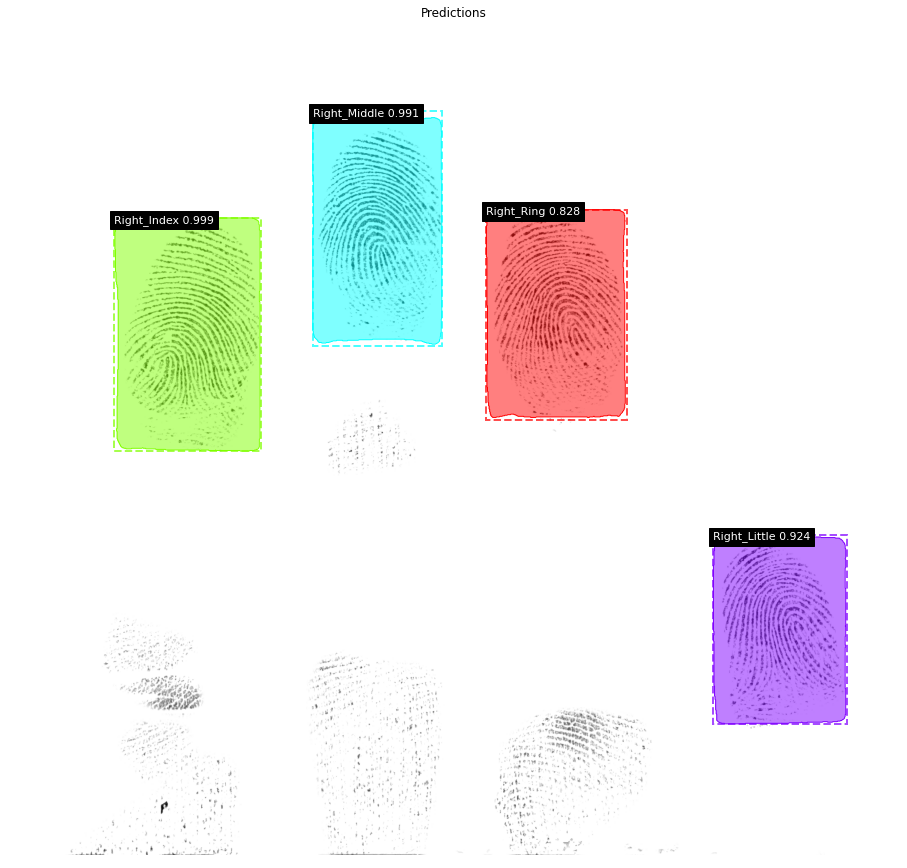

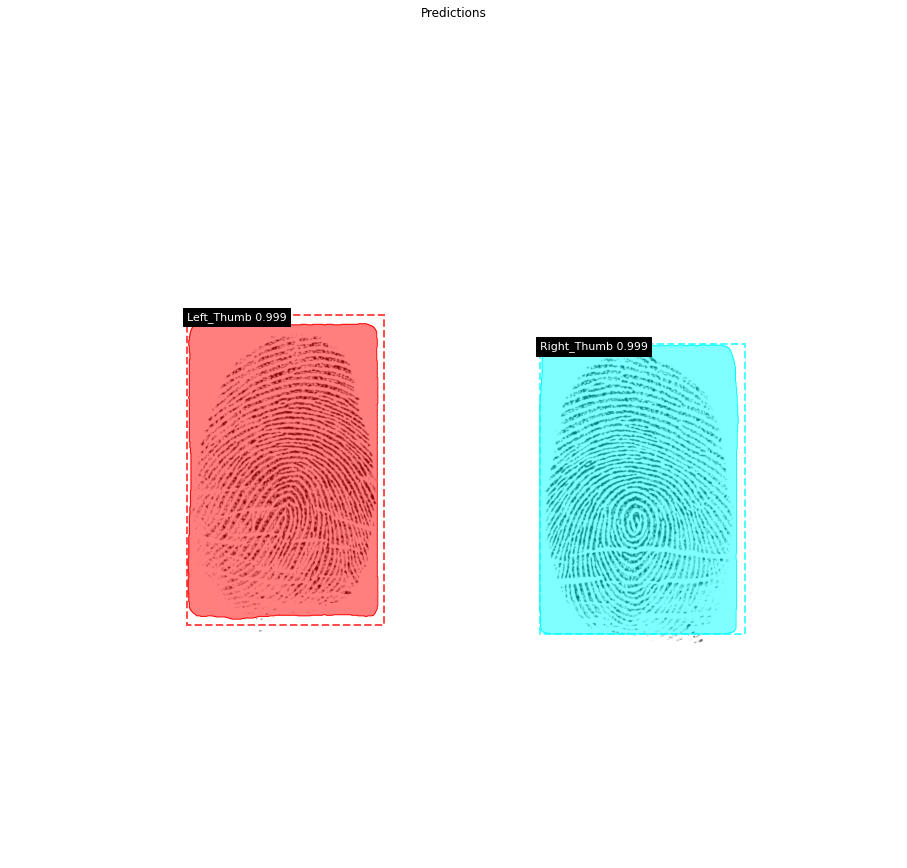

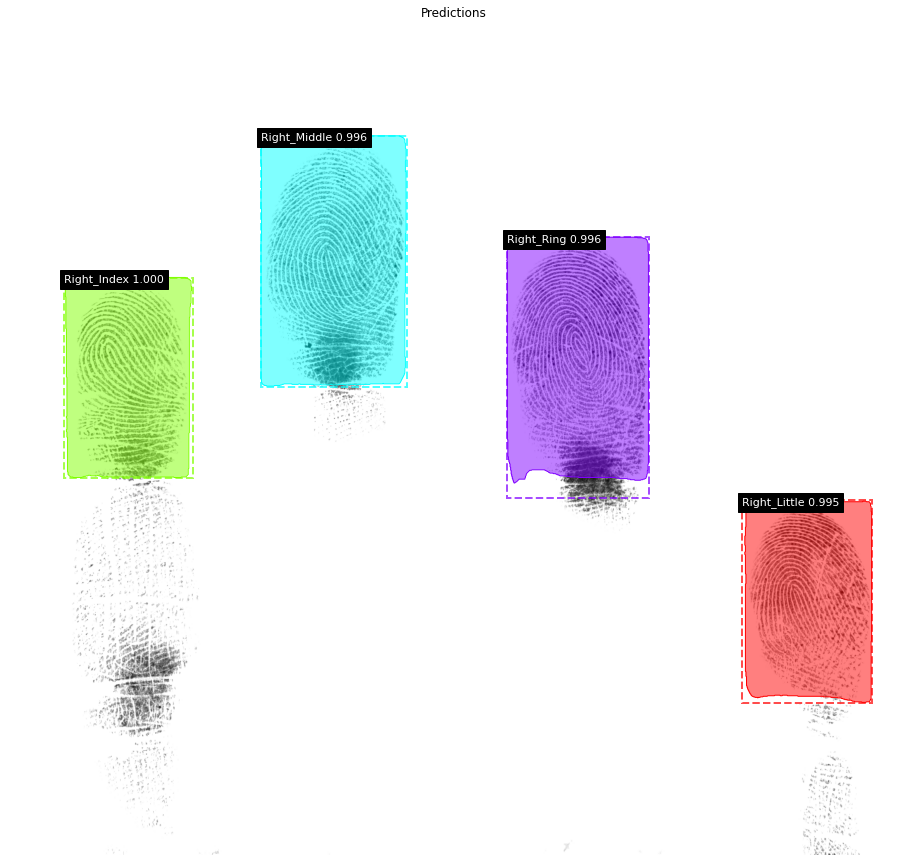

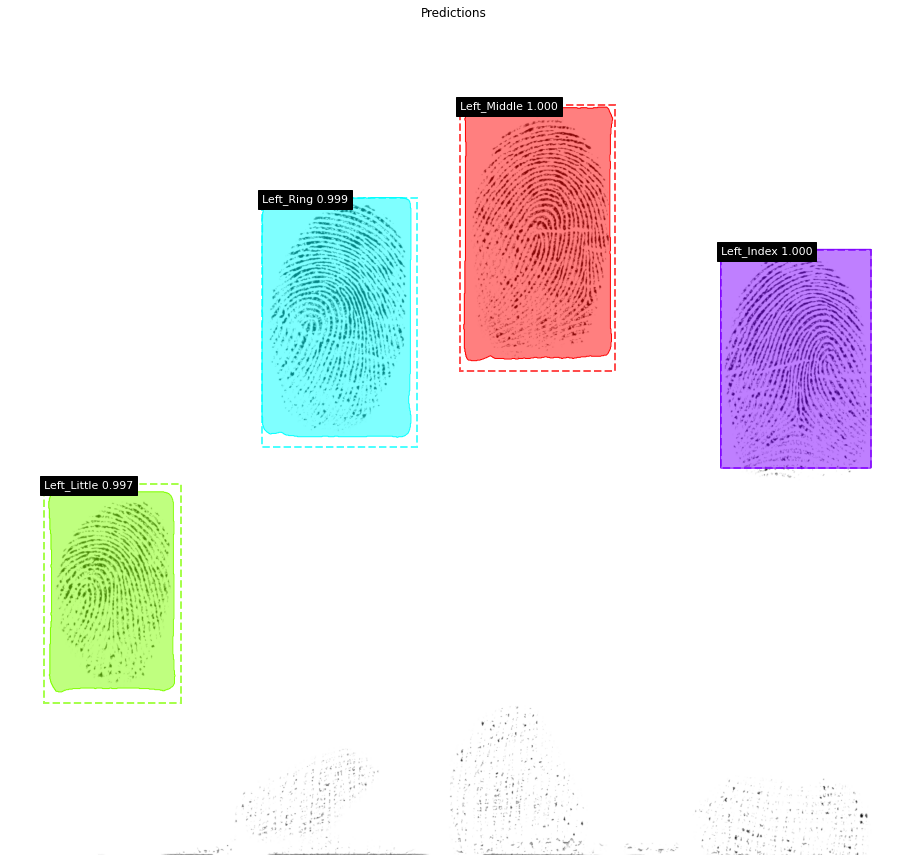

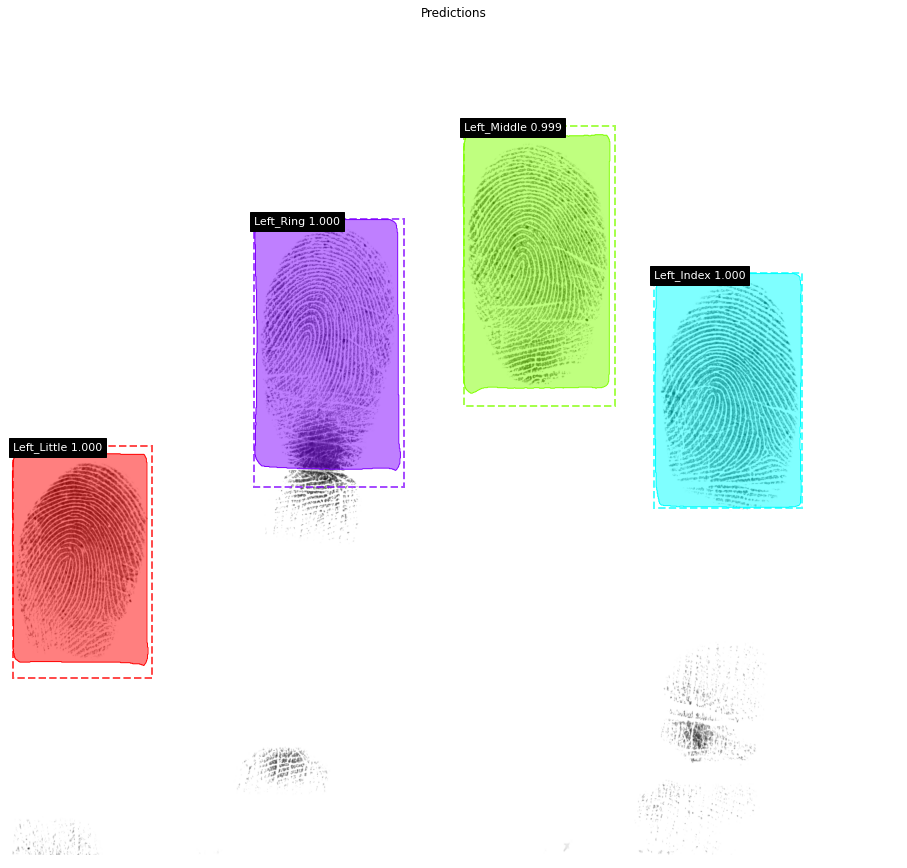

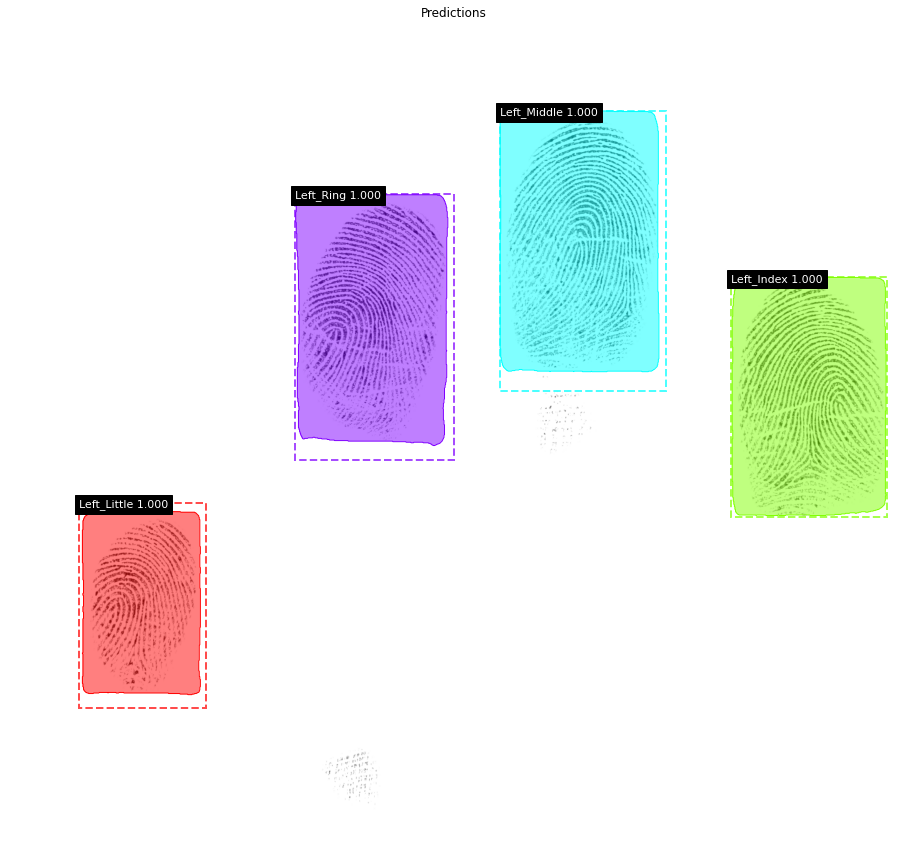

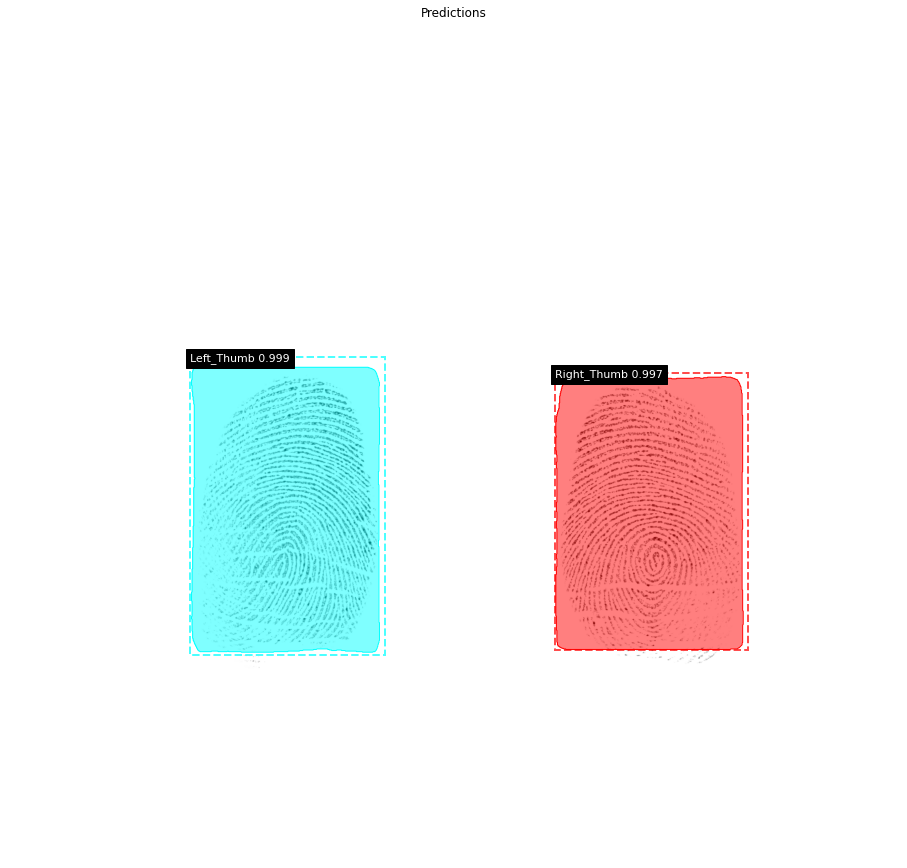

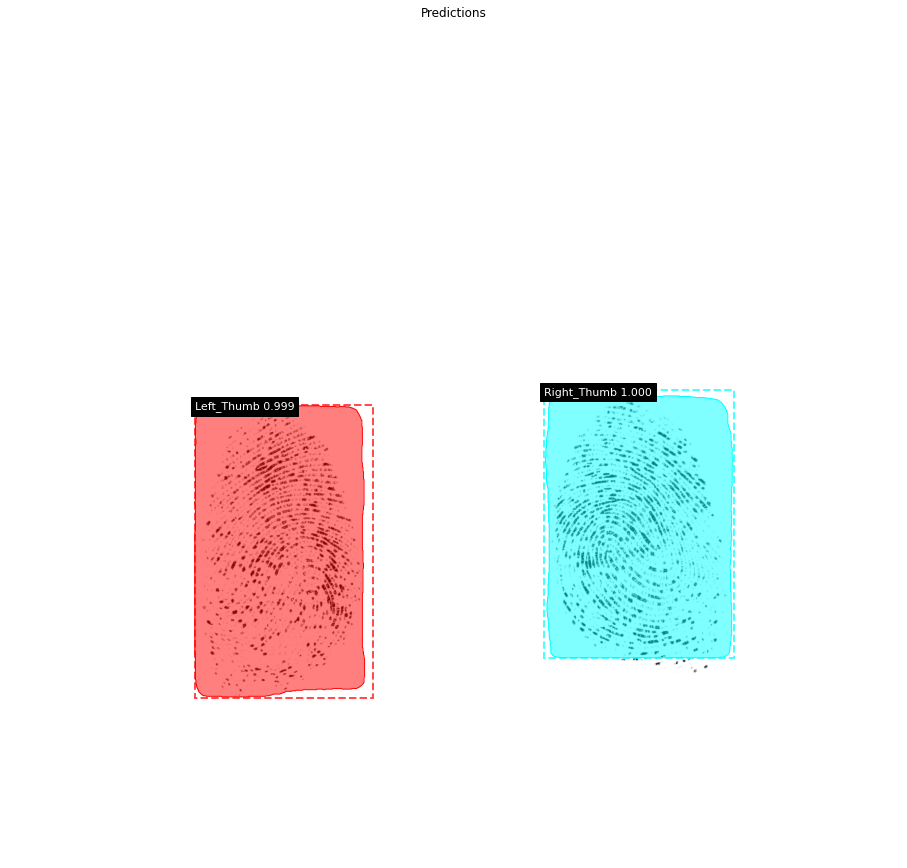

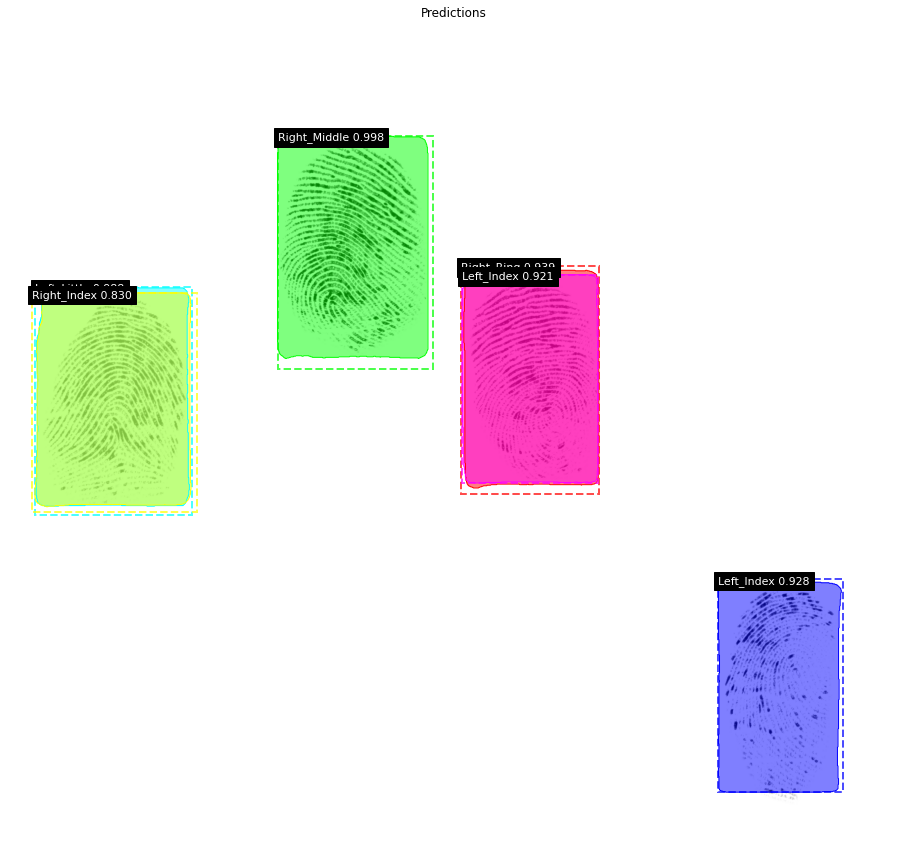

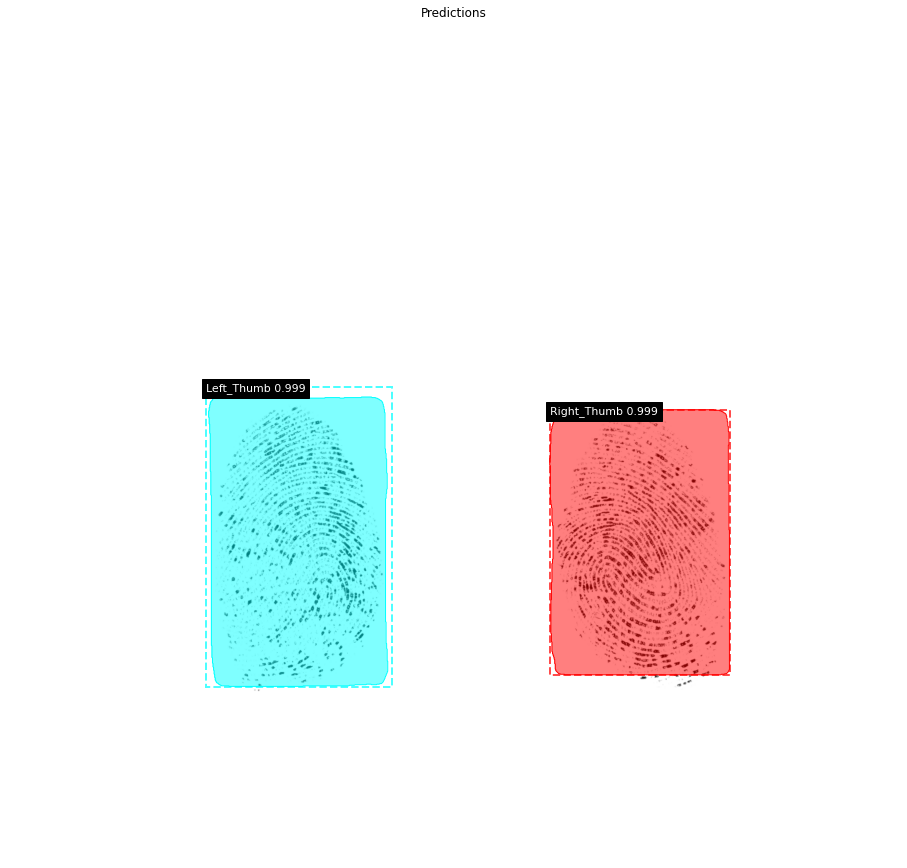

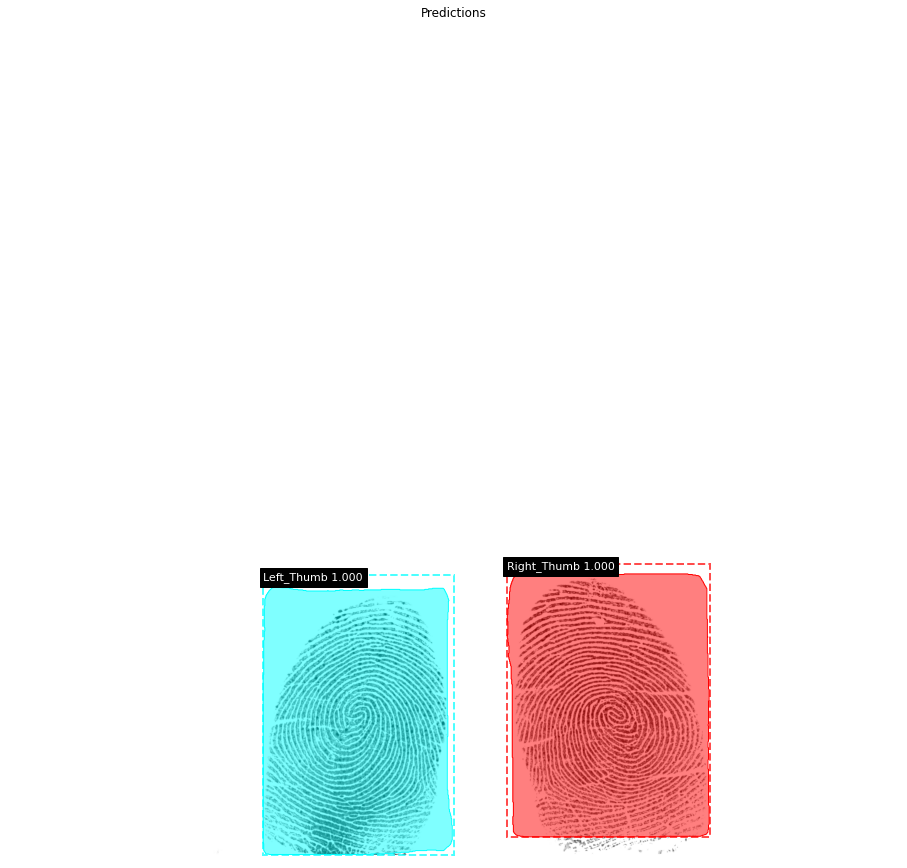

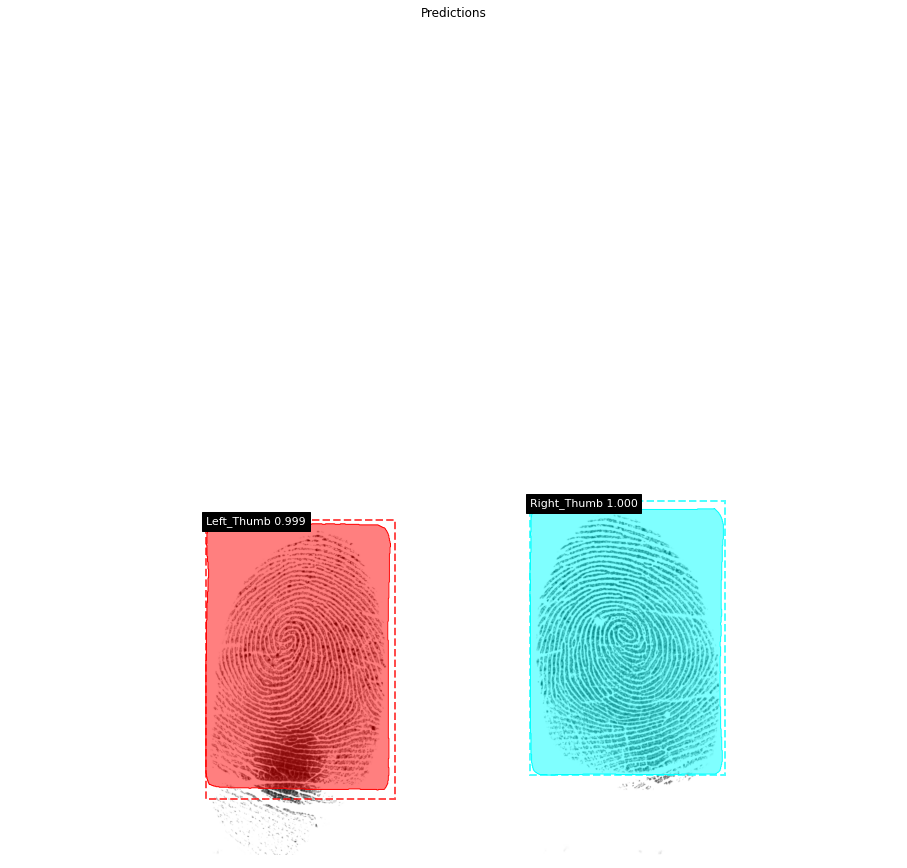

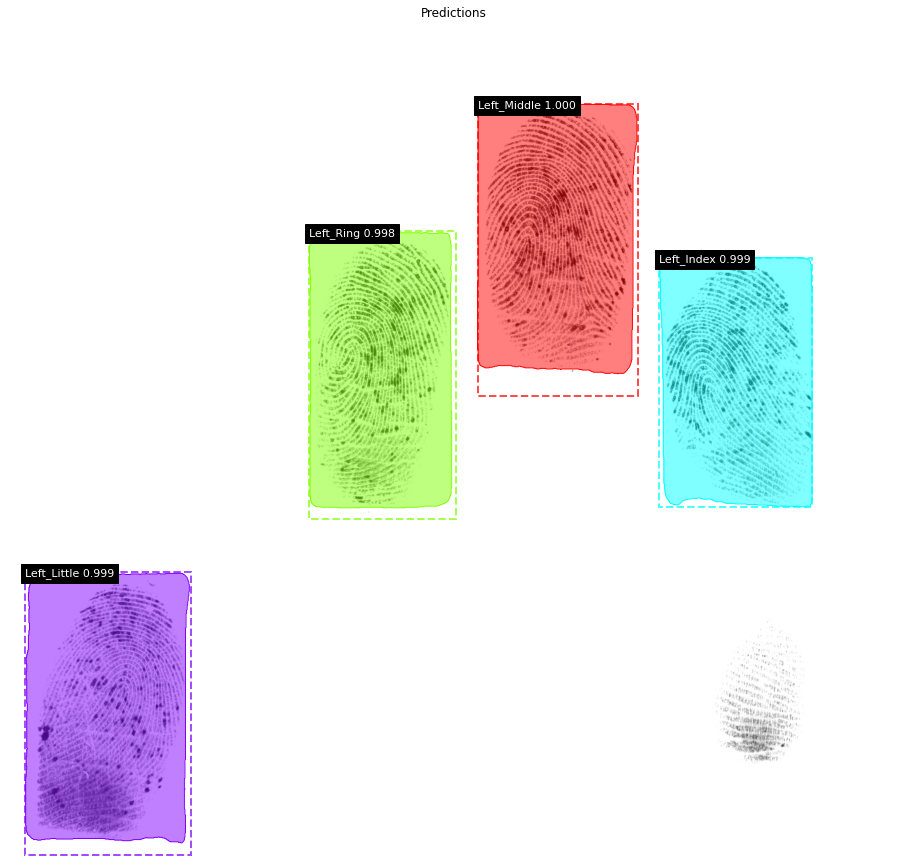

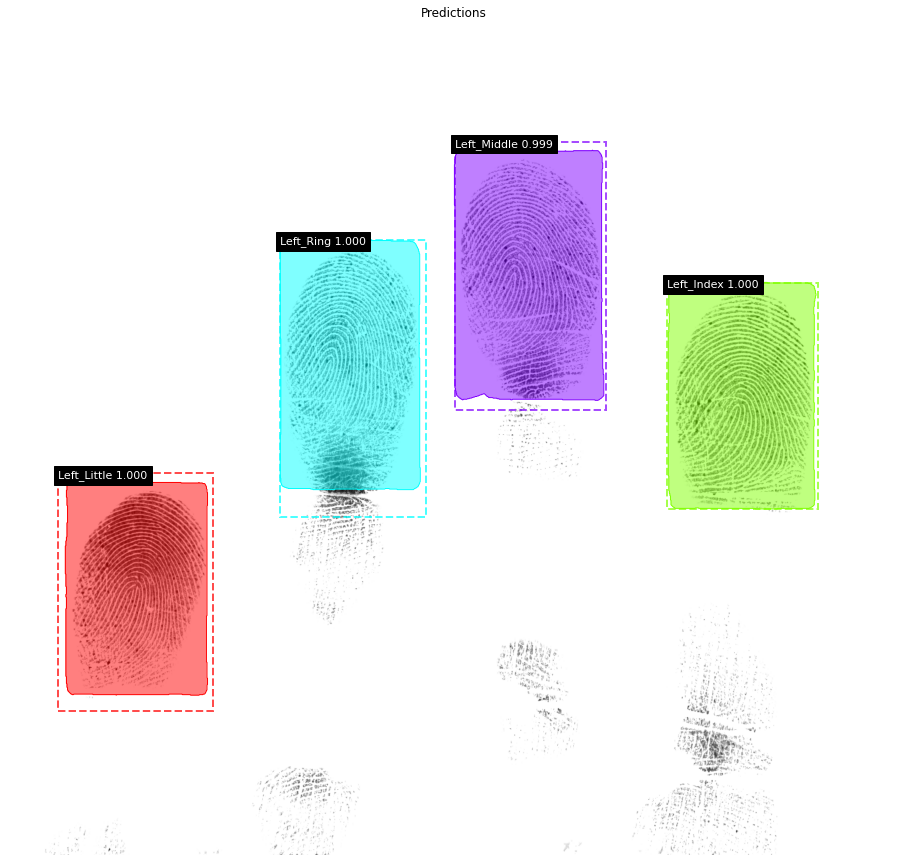

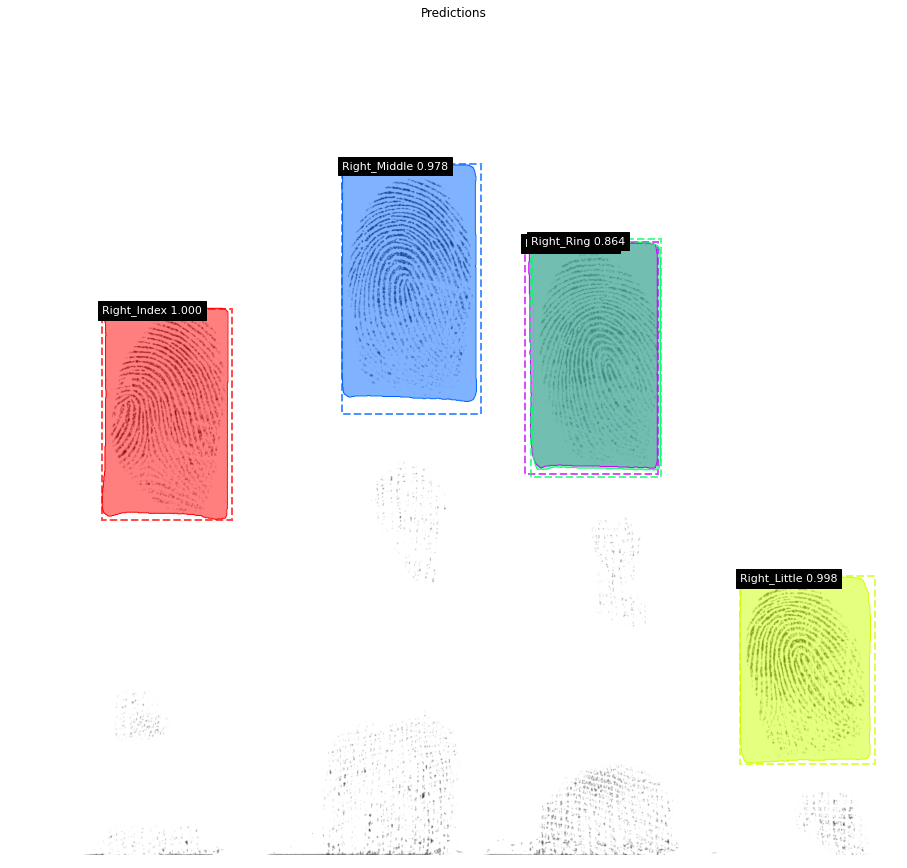

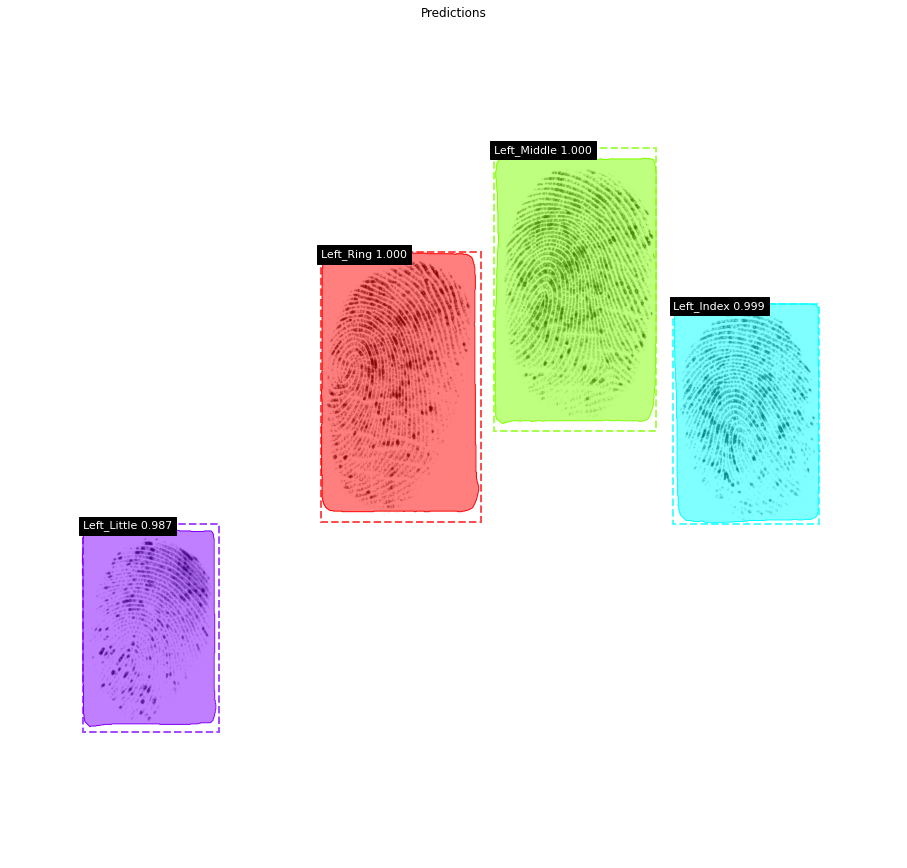

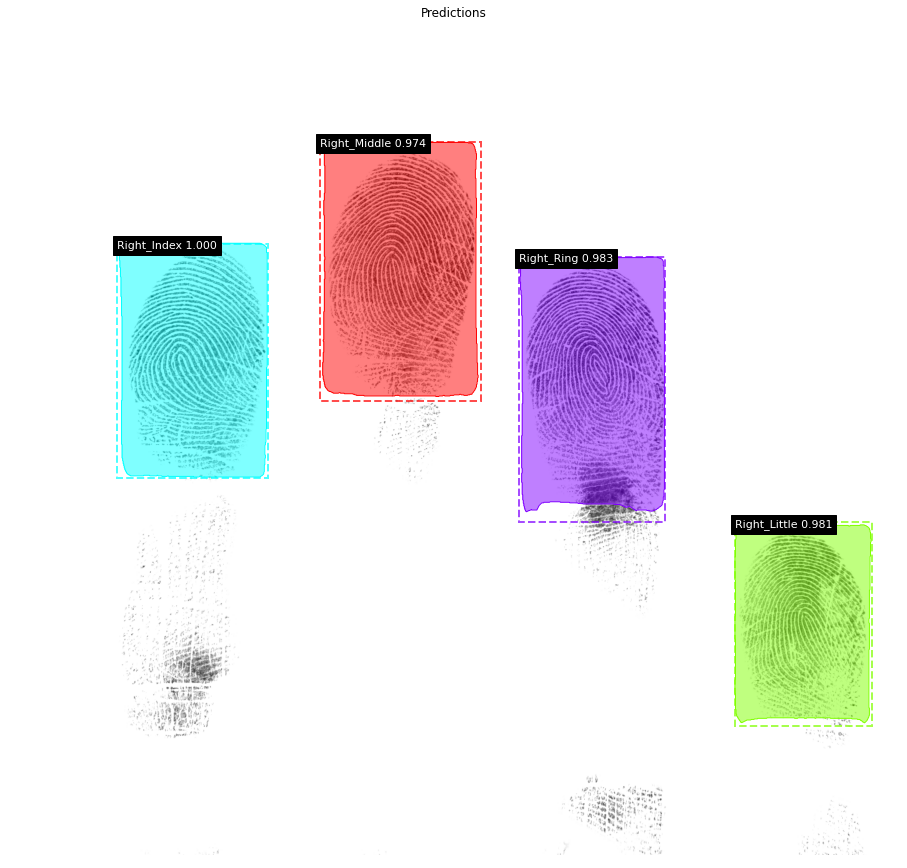

In [35]:
input_img = os.listdir("test.image")
# print(input_img)
for img in input_img:
    print("image name: " ,img)
    image = load_img("test.image/"+img)
    image = img_to_array(image)
    class_names = ['BG', 'Right_Index', 'Right_Middle', 'Right_Ring', 'Right_Little', 'Left_Index', 'Left_Middle', 'Left_Ring', 'Left_Little', 'Right_Thumb', 'Left_Thumb']

    # Run object detection
    results = model.detect([image], verbose=1)
    #print("results: " ,results)
    # Display results
    # a = model.keras_model.evaluate([image], verbose=1)

    r = results[0]
#     print(results[0].get("rois"))
#     print(results[0].get("class_ids"))
#     print(results[0].get("scores"))

    #print("results: " , r)
    #find_best_result_index(r)
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                class_names, r['scores'],
                                title="Predictions", ax=get_ax())